In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
df = pd.read_csv('./uncertainty_stream/submission_uncertainty3.csv.gz', compression='gzip')
df2 = pd.read_csv('./temp/submission_uncertainty_ensemble_naive.csv.gz', compression='gzip')
df3 = pd.read_csv('./temp/submission_uncertainty_ensemble.csv.gz', compression='gzip')

In [9]:
train = pd.read_csv("./data/sales_train_evaluation.csv")
train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [113]:
truth = train.iloc[:, -28:].sum().values
lower1 = df[df['id'].str.contains('Total_X_0.025_validation')].iloc[:,1:].values[0]
median1 = df[df['id'].str.contains('Total_X_0.500_validation')].iloc[:,1:].values[0]
upper1 = df[df['id'].str.contains('Total_X_0.975_validation')].iloc[:,1:].values[0]

In [114]:
lower2 = df2[df2['id'].str.contains('Total_X_0.025_validation')].iloc[:,1:].values[0]
median2 = df2[df2['id'].str.contains('Total_X_0.500_validation')].iloc[:,1:].values[0]
upper2 = df2[df2['id'].str.contains('Total_X_0.975_validation')].iloc[:,1:].values[0]

In [115]:
lower3 = df3[df3['id'].str.contains('Total_X_0.025_validation')].iloc[:,1:].values[0]
median3 = df3[df3['id'].str.contains('Total_X_0.500_validation')].iloc[:,1:].values[0]
upper3 = df3[df3['id'].str.contains('Total_X_0.975_validation')].iloc[:,1:].values[0]

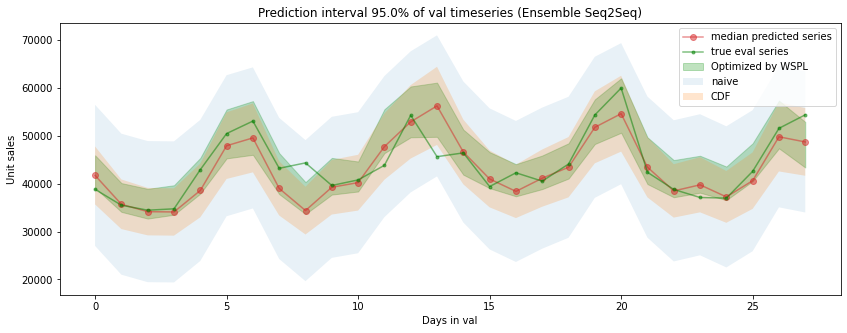

In [134]:
plt.figure(figsize=(14,5))

plt.plot(np.arange(0, len(median)), median, 'o-', label="median predicted series", color='tab:red', alpha=0.5)
plt.plot(truth, '.-', color="green", label="true eval series", alpha=0.5)
plt.fill_between(np.arange(0, len(median1)), lower1, upper1, alpha=0.3, color='tab:green', label='Optimized by WSPL')
plt.fill_between(np.arange(0, len(median2)), lower2, upper2, alpha=0.1, label='naive')
plt.fill_between(np.arange(0, len(median3)), lower3, upper3, alpha=0.2, label='CDF')
plt.title("Prediction interval {}% of val timeseries (Ensemble Seq2Seq)".format((0.975-0.025)*100))
plt.xlabel("Days in val")
plt.ylabel("Unit sales")
plt.legend()
plt.savefig('interval.png')